# Imports, data, and questions to answer

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

df = pd.read_csv('Data/data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


* The features to analyze: 
    * VitD_levels
    * Doc_visits
    * TotalCharge

* For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
2. Add a line for the mean (red)
3. Add a line for the median (green)
4. Add a line for for +1 std from the mean (black)
5. Add a line for the - 1 std from the mean (black)
6. Highlight the range between +1 and =1 std (yellow)

* Answer the following questions:
1. Is it Discrete or Continuous?
2. Does it have a skew? If so, which direction (+/-)
3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

# Vitamin D

In [3]:
# checking the column

vitD = df['VitD_levels']
vitD

0      19.141466
1      18.940352
2      18.057507
3      16.576858
4      17.439069
         ...    
995    16.631573
996    17.810233
997    17.011913
998    16.526670
999    19.487658
Name: VitD_levels, Length: 1000, dtype: float64

In [6]:
# calculate mean and median
mean = df['VitD_levels'].mean()
median = df['VitD_levels'].median()
print('The mean is:',mean)
print('The median is:',median)

The mean is: 17.992380894860002
The median is: 18.020163095


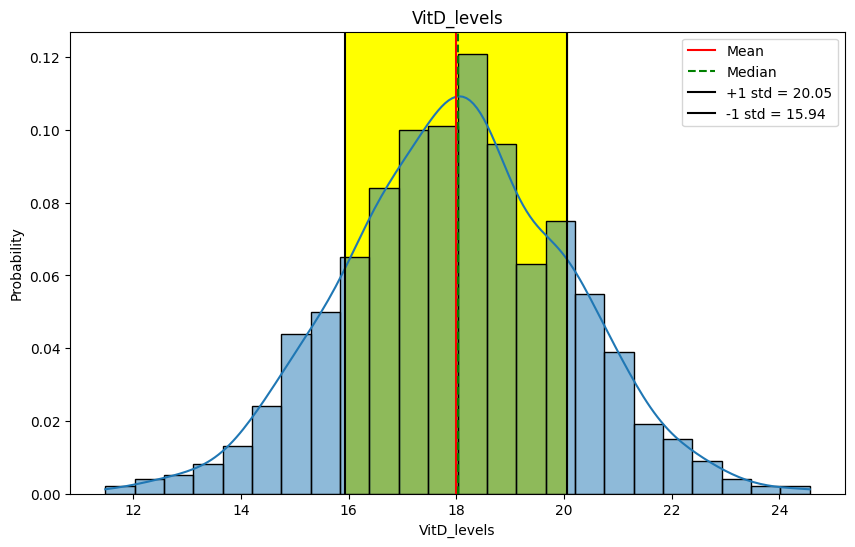

In [9]:
# creating a histogram to measure the distribution

col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde = True)
ax.axvline(mean, color = 'red', label='Mean')
ax.axvline(median,color = 'green', label = 'Median', ls = '--')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();



In [22]:
#Getting kurtosis
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

1. **Is it Discrete or Continuous?:** This column is continuous, there are a near infinite number of values.

2. **Does it have a skew? If so, which direction (+/-):** There is no skew, most of the values are clustered in the middle

3. **What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic):**The kurtosis is approximately 3, makinf this column  Mesokurtic. The values cluster in the middle.

# Doc Visits

In [10]:
#checking column
visits = df['Doc_visits']
visits.head()

0    6
1    4
2    4
3    4
4    5
Name: Doc_visits, dtype: int64

In [11]:
# calculating mean and median
mean = df['Doc_visits'].mean()
median = df['Doc_visits'].median()
print('The mean is:',mean)
print('The median is:',median)

The mean is: 4.992
The median is: 5.0


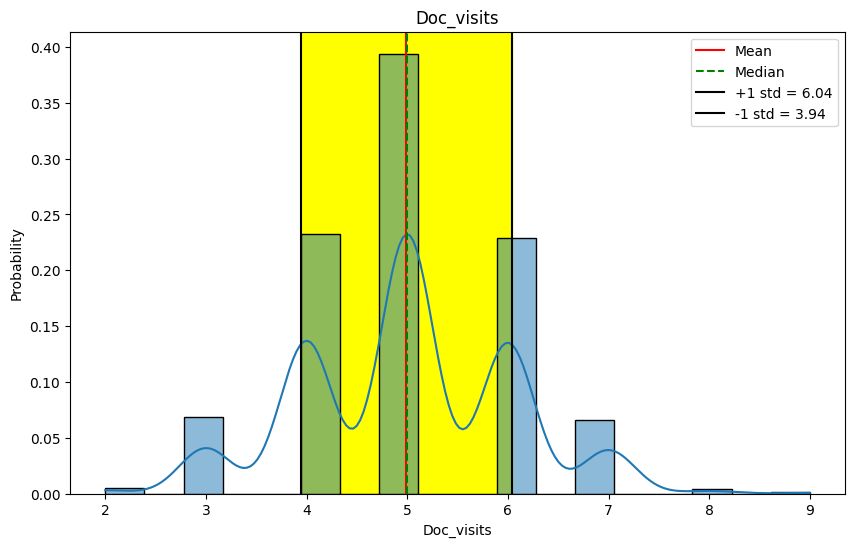

In [12]:
# creating a histogram to measure the distribution

col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde = True)
ax.axvline(mean, color = 'red', label='Mean')
ax.axvline(median,color = 'green', label = 'Median', ls = '--')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [21]:
#Getting kurtosis
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

1.  **Is it Discrete or Continuous?:**
The column is Discrete, a person has a limited number of doctor visits available to them due to time.

2. **Does it have a skew? If so, which direction (+/-):** There is no skew, most of the data is clustered in the middle.

3. **What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic):**
The Kurtosis is aproximately 3, making the column Mesokurtic, most of the values are clusterd in the middle.

# Total Charge

In [14]:
# checking column
charges = df['TotalCharge']
charges

0      3726.702860
1      4193.190458
2      2434.234222
3      2127.830423
4      2113.073274
          ...     
995    2747.196682
996    3661.760740
997    5259.932456
998    3083.731857
999    2830.020820
Name: TotalCharge, Length: 1000, dtype: float64

In [15]:
# calculating mean and median
mean = df['TotalCharge'].mean()
median = df['TotalCharge'].median()
print('The mean is:',mean)
print('The median is:',median)

The mean is: 3240.9716133389998
The median is: 3164.6792455


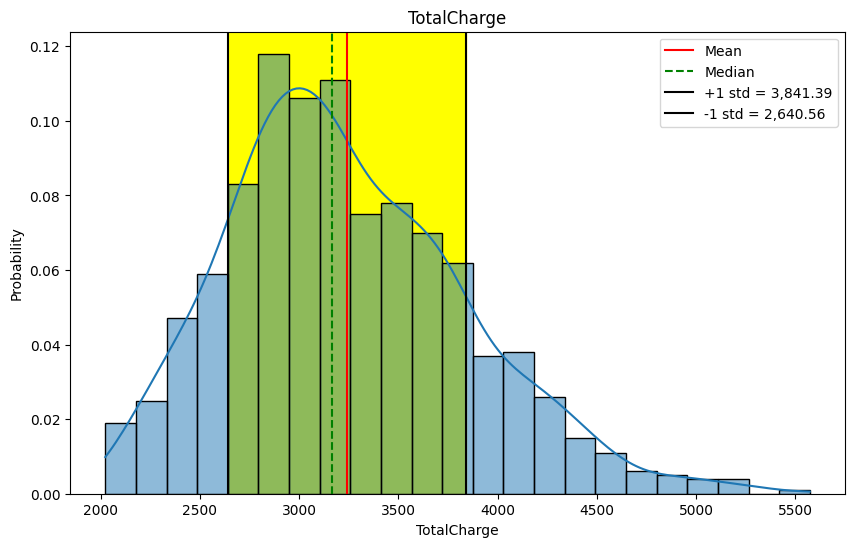

In [16]:
# creating a histogram to measure the distribution

col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde = True)
ax.axvline(mean, color = 'red', label='Mean')
ax.axvline(median,color = 'green', label = 'Median', ls = '--')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [20]:
# getting kurtosis
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt


3.2650077463439384

1. **Is it Discrete or Continuous?:** The column is continuous, the data can take on a near infinite number of values.

2. **Does it have a skew? If so, which direction (+/-):** The data is skewed to the right, in the positve direction.

3. **What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic):** The kurtosis is greater than three, meaning there is a leptokurtic kurtosis.